# DBSCAN clustering of IRIS Dataset

In [25]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn import metrics
import matplotlib.pyplot as plt


In [26]:
#load iris data set
iris = load_iris()
X, y = iris['data'], iris['target']

In [27]:
db = DBSCAN(eps=0.6, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Homogeneity: 0.598
Completeness: 0.750
V-measure: 0.665
Adjusted Rand Index: 0.540
Adjusted Mutual Information: 0.589
Silhouette Coefficient: 0.423


/usr/local/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


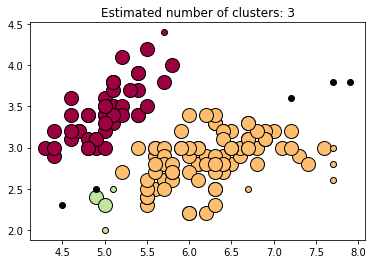

In [28]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXcAAAEICAYAAACktLTqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzsnXl4FEX+/181M7mJCRAUwhURUeRQXOTLAgEvCEsioHghKv7kUK5VRMEFr2UDCwjeoAZwFRcUUTlCNAEFSQBROZRTAyhyyUqAQICEMJn6/TEzYZLM0T3pJJOkXs+T55l011R9qrunpqf6Xe+PkFKiUCgUipqFqaoDUCgUCoXxqMFdoVAoaiBqcFcoFIoaiBrcFQqFogaiBneFQqGogajBXaFQKGoganCv4Qgh4oUQv1R1HO4QQtwshDhc1XEACCGkEKJlFbV9jRDiRyFEnhDi7zreFzDHTxF4qME9QBFCHBBC5Ashzrr8vaXhfSUGKSlllpTymgqK8X0hRHJF1F3LGA+slVJGSinfqOzGHdfa7ZXdrqPt+4UQvwghTgsh/hRCfCCEuKwqYqlpqME9sLlDSlnH5W90VQek8I4QwuLH25oDu4yOpTIQdsozjmwAukopo4AWgAVQNwwGoAb3aogQoqUQYp3jbidHCLHYsT3TUeQnx53+faV/ujvu0p4RQmwXQpwTQswXQlwhhPjSMS3wlRCirkv5JUKIY462MoUQbRzbhwODgPGOtlId22OFEJ8JIY4LIX5znWYQQoQ57vZPCSF2Azf56KcUQjwuhNgrhMgVQswWQgjHvpeEEP91KRvnKG9x/P+NECJZCLHRGZ8Qor4QYqEQ4owQ4gchRFypJvsIIX51HNOXXQctIcSjQog9jtgzhBDNS8U5SgixF9jroS99hRC7HP34RgjR2rF9DXAL8JYjzlZu3ltPCPEfIcRRR/vLvByvli7/F/+yEkLECCFWOto/KYTIEkKYhBAfAs2AVEf74x3lOzuOXa4Q4ichxM0u9X4jhJgihNgAnAdaCCEecRy7PMd5H+QuxtJIKQ9JKXNcNhUBVTI9VuOQUqq/APwDDgC3e9j3ETAJ+5dzKNDNZZ8EWrr8fzNwuFS9m4ArgMbAn8BWoIOjrjXAiy7lHwUigRDgNeBHl33vA8ku/5uALcALQDD2O7FfgQTH/mlAFlAPaArsdI3NTT8lsBKIxj4AHQd6O/a9BPzXpWyco7zF8f83wD7gKiAK2A1kA7djvztcAPynVFtrHbE1c5Qd6tjXz1FXa8d7nwM2lnrvasd7w9z0oxVwDugJBGGfhtkHBLvEOtTLcUgDFgN1He/v4eHclj73xecH+DfwjuP9QUA8INxda47r4gTQx3FOezr+b+AS70GgjeN4RAFngGsc+xsBbRyvmwG5QDMv/esGnHbEfw7oVdWfv5rwp+7cA5tljjsn598wx/aL2H/Kx0opC6SU63XW+6aU8n9SyiPYB9vvpJTbpJQFwFLsAz0AUsr3pJR5UsoL2AfU64UQUR7qvQn7ADBZSlkopfwVmAvc79h/LzBFSnlSSnkI0DK/PE1KmSulPIh98L1BRz//I6XcL6U8DXwJ7JdSfiWltAJLXPvpYLojtoPYv8gGOrY/DvxbSrnH8d6pwA2ud++O/SellPlu4rgPSJNSrpZSXgRmAmFAF18dEEI0Av4GPC6lPCWlvCilXKf5CFziIvZBt7mjjizpGFnd8CDwhZTyCymlTUq5GtiMfbB38r6UcpfjeFgBG9BWCBEmpfxDSrkLQEp5UEoZ7TimbpFSrpf2aZkmwMvYv2wU5UQN7oFNf8cHw/k317F9PCCA7x0/9R/VWe//XF7nu/m/DoAQwiyEmCaE2C+EOMOlD12Mh3qbA7GuX0jAROy/EgBigUMu5X/XEOsxl9fnnbFpRFM/XSgdW6zjdXPgdZc+ncR+/Bt7eG9pYnHpq5TS5ijf2OM7LtEUOCmlPKWhrDdexv5rYZVj+uRZL2WbA/eUOo/dsH85OCnur5TyHPYvsMeBP4QQaUKIa/UG6LjZSAc+1vteRVnU4F4NkVIek1IOk1LGAo8Bc0TFyPgewD4lcTv2n95xju3CGUqp8oeA30p9IUVKKZ13fH9gH6ycNCtHbOeAcJf/G5ajLielYzvqeH0IeKxUv8KklBtdynuzVz2KfcAE7A8hHW0d0RDTIaCeECJaQ9nzeDgmjl9f46SULYC+wFNCiNs8xH4I+LBUfyOklNNcypR4j5QyQ0rZE/sXwM/Yf7H5gwX7VJqinKjBvRoihLhHCNHE8e8p7B80m+P//2Gf6zaCSOAC9vnWcOzTEa6Ubut7IE8IMcHx8NQshGgrhHA+OP0E+IcQoq4j/jHliO1HoLsQopljmugf5ajLyTOO2JoCT2Cf5wb7XPU/xKWHyVFCiHt01PsJkCiEuE0IEQSMw35cN3p/G0gp/8A+pTTHEVuQEKK7h+I/Ag84jntvoIdzhxAiSdgfxAvs89tFeL5m/gvcIYRIcNQVKuwP5pvgBmF/IN9PCBHh6NdZl7q9IoQYJIRo5njdHJgCfK3lvQrvqME9sHEqGJx/Sx3bbwK+E0KcBVYATzjmt8E+L/6B4+f0veVsfwH26YQj2B9Ibiq1fz5wnaOtZVLKIiAJ+7z4b0AOMA/7XT/APx31/QasAj70NzDHPPBiYDv2h7gr/a3LheWOun7E/hBzvqOtpcB04GPH9NRO7PPgWmP9Bfs89pvYj8kd2GWuhRqreAj7nPnP2B+AP+mh3BOOunOxK5lcVTVXA19hH3i/BeZIKdc69v0beM5xHp92PA/ph31K7Tj2O/ln8DxemICnsP9COYn9S2UEgOPL96xzAHfDdcBGIcQ57LLIX4BhHsoqdOB8Wq5QKBSKGoS6c1coFIoaiBrcFQqFogaiBneFQqGogWge3B1PzbcJIco8uHIsPT4u7M52PwohhhobpkKhUCj0oMfk6AlgD+DJsW2x1GFsFRMTI+Pi4nQ0r1AoFIotW7bkSCkb+CqnaXB36FsTsWtQnypnbADExcWxefNmI6pSKBSKWoMQQsvKbs3TMq9hX/LubWHCAGF3GvzUsQjEXVDDhRCbhRCbjx8/rrFphUKhUOjF5+AuhEgC/pRSbvFSLBWIk1K2x+6O94G7QlLKFCllRyllxwYNfP6qUCgUCoWfaLlz7wr0FUIcwG7oc6tw8dEGkFKecLgGgn1F4l8MjVKhUCgUuvA5uEsp/yGlbCKljMNu3bpGSvmgaxmHLamTvtgfvCoUCoWiivAnJRgAQojJwGYp5Qrg70KIvth9nU8CjxgTnkKhUCj8QdciJinlN1LKJMfrFxwDu/Puvo2U8nop5S1Syp8rIlhFzWXRwoVcE3cVZpOJa+KuYtHChVUdkkJRrfH7zl2hMIpFCxcybvhoHjp/JVfTg72/n2bccPuSiQcGaUrFqVAoSlFlrpAdO3aUSueuALgm7ir6/R5F60t5udkjT7G8+Wl+ObC/CiNTKAIPIcQWKWVHX+WUt4yiytl38DeupmRa1quJYt/B36ooIoWi+qMGd0WV07LZlezldIltezlNy2ZXVlFECkX1Rw3uiirnxSmT+TD8N/bIU1iljT3yFB+G/8aLUyZXdWgKRbVFPVBVVDnOh6b/nPQC+w7+SMtmVzJrylvqYapCUQ7UA1WFQqGoRqgHqgqFQlGLUYO7QqFQ1EDU4K5QKBQ1EDW4KxQKRQ1EDe4KhUJRA1GDu8JvbDYb6enp/O3WnlwWHoHZZOKy8Aj+dmtP0tPTsdm8Je5SKBQVidK5K/wiOzubpJ69sZ06R3xePZK5kXAsnM+3sm3tYUZvHoypXgQrV6XTqlWrqg5Xoah1qMFdoZvs7Gy6depMUl5DutniEEIU74skmO7EEp/XiPXnjtGtU2fWf79JDfAKRSWjpmUUurDZbCT16k1SXkPiZaMSA7srQgjiZSMS8xpyR6+/qSkahaKSUYO7QherVq1CnjxHN1tDTeXjbQ0pOnmW1atXV3BkCoXCFTW4K3Tx+oxZdMur5/GOvTRCCOLP1uO16TMrODKFQuGKGtwVutiwaSMdiNH1ng4yho2bvq2giBQKhTvU4K7QxbmCfMJ1PocPw8K5C/kVFJFCoXCHGtxrKBWlQY8IDeM8Vl3vycdKREiYX+0pFAr/UFLIGkhFatC7du7CtrWH6U6s5vdsEzl06fxXvd1QKBTlQN251zCcGvRuh0OZmNeG7iKWSBGMWZiIFMF0F7FMzGtDt0OhdOvUmezsbF31PzF+HFmRJ9GaB0BKSWbESZ6c8LQ/3VEoFH6iBvcaRGVo0Hv16oWpXgTrTcc0lc8yHcNSvw49e/bU3IZCoSg/anCvQVSGBt1kMrFyVTorI4+RKf7weAcvpSRT/EFa5DFSV32JyaQuNYWiMlGfuBpEZWnQW7VqxfrvN7GhaQFTI3eRKY+SJwuxSht5spBMjjI1chcbm15Q1gMKRRWhBvcaRGVq0Fu1asXPv+5j9pIFHLulCc+HbWOEKZPnw7Zx7OYmzF6ygD2/7lUDu0JRRSi1TA2isjXoJpOJhIQEEhIS/Hq/QqGoONSdew2iJmrQlWe8QuEf6s69BlHTNOjKM16h8B91516DqEka9IrW6ysUNR01uNcgaooGXXnGKxTlR/PgLoQwCyG2CSFWutkXIoRYLITYJ4T4TggRZ2SQCm3UFA268oxXKMqPnk/1E8AeD/uGAKeklC2BV4Hp5Q1M4R81QYOuPOMVivKjaXAXQjQBEoF5Hor0Az5wvP4UuE1o/WQqDKe6a9CVZ7xCUX60qmVeA8YDkR72NwYOAUgprUKI00B9IMe1kBBiODAcoFmzZv7Eq9BIddagK894haL8+LxzF0IkAX9KKbeUtzEpZYqUsqOUsmODBg3KW52iArFarSQnJxNbtwFBwowQgiBhJrZuA5KTk7Fa9enp9VAT9foKRWWjZVqmK9BXCHEA+Bi4VQjx31JljgBNAYQQFiAKOGFgnIpKJCMjg+jQCGY//28ScmOYRRfmcjOz6EJCbgyzn/83UaERZGRkVEj7XTt3YVvJH30+CWS9vkJRFfgc3KWU/5BSNpFSxgH3A2uklA+WKrYCGOx4fbejjDaxtSKgyMjIoF/vRO4pupIp/J9bffkU/o97i66kX+/EChnga5JeX6GoKvzWwAkhJgsh+jr+nQ/UF0LsA54CnjUiOEXlYrVauSuxLwNpSXfR2Ku+vLtozP20ZEBiP8OnaGqKXl+hqEp0De5Sym+klEmO1y9IKVc4XhdIKe+RUraUUnaSUv5aEcEqKpZp06YRVWQhXqN9QXdiiSwyM326scrXmqLXVyiqElFVsycdO3aUmzdvrpK2Fe6JrduAhNwYugvt3jTr5BFWRZ/g6KnjhseTnZ1NUq/e2E7avWU6EEMYFvKxsk3kkFXnJOZ6dUhd9WXAyjoVCqMRQmyRUnb0VU7d6iiKOZ57Ure+/EYacDz3ZIXEU931+gpFVaJcIRXFWLH5pS8vouI8XaqzXl+hqErUnbuiGAsmv/TlZnUZKRQBh/pUVkMKCwsZPHgwl1nCCBImxwIjE5dZwhg8eDCFhYV+1dsgup5ufflWjtMgup5f7YFKxqFQVBRqcK9mzJ8/n6iQcDIWLGFAURyz6OpYYNSVAUVxZCxYwmUh4cyfP1933SPHPUE6B3Xpy9M5xKinn9TdFtgfmF57ZUtG3zuYhmsPk5x/I+/KHiTn30jDtYcZfe9grm3RUnm1KxR+oNQy1Yj58+czcuhwHuBq4ol1q0OXUpLFURaxlznzUhgyZIjm+q1WK1GhEdxbdCXdRWOf5dfJI3xqPkBuwVksFn1z9c5kHEl5Delma+ixL+tNx1gZeSxgHSwVispGq1pGDe7VhMLCQi4LCS9eYOSLdfIIi9nH6QvnCQ4O1tyOc4Xq/bSku5cvkEyO8jH7WJ6epvthp81m49oWLel2KJR42chn+UzxBxubXmDPr3uVll1R61FSyBrGsGHDqEuIrgVGUQQzfPhwXe0kJCSwPD2NJebfmMR3Zfzg18kjTOI7PjUf8GtgB5WMQ1E9WbhwIXFxcZhMJuLi4li4cGGV1KEVdedeTbjMEsaAojjdC4w+N//OGat+K1yr1cr06dOZPfM1jueepAgbZkw0iK7HqKefZMKECbqnYpz87daeNFx7WFdfMjnKsZub8OUaNcArKp+FCxcyfPhwzp8/X7wtPDyclJQUBg0aVGl1gJqWqXEECROz6Eqk0D7FkicLGccGLsrAUpxcFh5Bcv6NuvvyfNg2Tp8/W4GRKRTuiYuL4/fffy+zvXnz5hw4cKDS6gA1LVPjsCL9XGAUeOacKhmHorpx8OBBXdsrqg49qMG9mmBB+LnAyL2zoy99udVqrTD9uUrGoahueMocpyejnBF16EHZD1QTwswhbCvKobvGB6pgX2AUZi479ZGdnU1Sz97YTtkNuZK5kXAsnM+3sm3tYUZ+/xD/KzhD/dA63Hbu8jL7R28ejKleBCtXpfslT+zauQvb1h7W1ReVjENRlUyZMsXtfPmUKVMqtQ49qDv3asKdg+7lS37XucDoIHc9eH+J7U59ebfDoUzMa+M2Gcdz59pxb9GVnDl3llZEl9k/Ma8N3Q6F0q1TZ78WGKlkHIrqxqBBg0hJSaF58+YIIWjevLnuB6FG1KEH9UC1mlBQUEB0WB1dOveP2Udu/llCQ0MBP/Tl8iirOMRkOmFyo3f3V3+udO4Khf+oB6o1jG+++YbokAgWsZd18ojXBBbr5BE+Yi/RIRGsW7eueJ9ufTmNsCDYjXtLX3/15yoZh0JR8ag792qCUxtejxDeZidRBNOb5iUSWGzlOBkc5DQXGUEbTooLJbThfunL5VF+JIe/i/bu95dDf66ScSgU+lE69xqGqzbcKm2k8zvr+IPTXKAIiRlBFCH0oBG9aY5FmMpow/3Vl/+DTbwlunvcXx79uc1mY/Xq1bw2fSYbN33LuQv5RISE0aXzX3lywtP07NlT3bErFC5oHdyVWqaa4KoNtwgTSVxJEld6fU9pbbi/+vICijS3oReVjEOhqBjULZELgeIt7i4Ok/RP5+6qDfdXXx6KWXMbCoUiMFB37g58ab/Lq+0ubxyvs51t6NO5l9aG+6UvJ4dWRGtuQ6FQBAbqzh1t2u/yarvLG0dPmrKGw+XShvujL1/DYW7FvfRS6c8VisCl1g/uNpuNpF69ScprSLxs5Na/HEAIQbxsRGJeQ+7o9TfDp2h8xdGGelzERhZ/aKovy3QMS/069OzZs3hbr169MNWLYL3pmLY6+AMrkutwn0bPXRsKhSIwqPWDe6B4i/uKwyQEY2jPUn4lUx71SxuuR1++Th5hKb8ymnZlFjAp/bnCSCrT47w2UeulkIHiLa41jmPyPG+ynSBM3EoTv7ThvvTl68Jz+LPgDPUc3jJKf66oKIzyOK9NKJ27RgLFW1xPHDYp2c1JVnGIn8lFmtCtDfelL7/tttv4+uuvlf5cUaEY5XFem1CDu0bMJhPvyh6YhfaByiptjDBlYi3yrP+urnEoFJWJyWRyOz0ohKg06XF1Q3nLaCRQvMVd47BKG6nyN56RGxku1/KoXMNwuZZn5EZS5W8UyiJ2yBO8wXaETSKEIEiYia3bgOTkZKxWa6Vo9gNlXYCi+lLZHue1iVp/5x5oc+7uvGPCsXAeK9vIIZ3fOUUhlxFEInFu9h8k13SRmJgYQvKLiufUXctkRZ4st2a/tB6/ItpQ1HzUnLt+1LSMRtLT0xl972Am5rXxKIN0RUrJlDq7mPPpAkOXzKenp/P/7rqfk/l5PMDVxBPrNh4pJVkcZRF7GU072or6Jfb/Ic8xlS0M4Cp6eKljvekYKyOPsf77TboHX6cePymvId1sDSukDUXtYeHChUyaNImDBw/SrFkzpkyZogZ2L6jBXSOB4i1eWFjIZSHhuvzaP2E/r9MNi2Oe3iYlz/MdCTTT9EvEn74EyvFSKGorhs25CyFChRDfCyF+EkLsEkL8002ZR4QQx4UQPzr+hvobeGUTKN7iM2bMoC4hxGu0BuhOLFEEkc4lpcEuThKMmXh8D7rgn2Y/UNYFKBQK72gZoS4At0oprwduAHoLITq7KbdYSnmD42+eoVFWMK1atWL995vY0LSAqZG7yJRHyZOFWKWNPFlIJkeZGrmLjU0vVNgUw5xZr9ObZpqmhsCuJkigGetcVqyu5Qi30FhXHfFn6/Ha9Jma43x9xiy65dWr0DYUCkX58Tm4SztOQXeQ469q5nIqkFatWvHzr/uYvWQBx25pwvNh2xhhyuT5sG0cu7kJs5csYM+veyts7vh47kk6EKPrPTfSgNNcKP7/F3J119FBxrBx07eay2/YtLHC21AoFOVHkyukEMIMbAFaArOllN+5KTZACNEdyAbGSikPualnODAcAlPqVJXe4lZsfnmtF7l8zxZg9asOPX7s/nrCl8fzXaFQ6EfTxLGUskhKeQPQBOgkhGhbqkgqECelbA+sBj7wUE+KlLKjlLJjgwYNyhN3jcOCyS+9vZlL0yOhDimi3jr0aPYDZV2AQqHwjq6nglLKXGAt0LvU9hNSSuf8wDzgL8aEV7kYsSjHarWSnJxMbN0GBAmz2wVG7mgQXY9t5OiKdyvHCcLEELmGUTKTcCykcgCblNiktC90ktsZJTOLy7wht7NDnsDmeHDsyY/dUz8otOmOs6o9353ntW9iAtFRdTCbzURH1aFvYoLm86qlDiPaUSiMwqcUUgjRALgopcwVQoQBq4DpUsqVLmUaSSn/cLy+E5ggpXT30LWYQJFCOjFiUU5GRgYDEvsSWWShN83cLjA6Y7byedqKMlM/ycnJzH7+30zh/zTr7SeyiY5cTn+uLLHIyQZIJGFYis3FXONYw2EuYmM07Zhf57cymn1v/UjlADs4wVQ6V+m6AK1kZ2fT/44+hJouMCLpGvp1u4roOiHknr3A8vX7eXvlLxTYQliW+oVXozVfdeQVmrHZbESFSr/bUSi0YJjOXQjRHvs0ixn7nf4nUsrJQojJwGYp5QohxL+BvoAVOAmMkFL+7K3eQBrcjViUk5GRQb/eiQykpc8FSB+xj+XpaSUGO6vVymUh4dxna+G3zt3ZxjqO8hn7mchfaCQiPMTxB0vYR4PYhuw/9HuxtNNXPy5p6ZtqirMqde7Z2dn0iO/C5Idv5NE+rT2ek/e+2MMLC7ayLmtjmfOqtY55aTuZOHcj69+8h2ualfW/99WOQqEVtYhJI0YsyrFarUSFRnBv0ZWaB+ZPzQfILTiLxWIpriMiOAykjYFcTXcvXxCZHOUjDytUi+OUR1nFISbTqYwfu5Nv5BGyYs+z79ABTCaT5n4ck+eZzlb6c6XXOLNMx0irohWqNpuNtq1bMbZvC4YkXuez/Ly0XbyeeoAdu38pPq/669jJ60u28dN7D2IyuT/m7tpRKPSgjMM0YsSinGnTphFVZNG1ACmyyMz06dNL1FFfBjOKtnzCPiaxqYzefp08wiQ28Qn7vQ7sAPE0woJgNyc9lulBLKa8C8V90dqPhiKcCdzIKg4x0U2clbEuwBerVq0izFzIo31aayo/pM91hIgLJc6r/jraEBJsZvXmg7raUSgqglp/526EcVhs3QYk5MboqmOdPMKq6BMcPXW8TB1WaSOd31nHH5zmAkVIzAgiCOI2GtOb5iWmYjzGKY/yIzn8XbTX1Be9/bBJycfs5TtzDiLYHFCe730TE7jjuiKGJJYWdnlmXtouVu42sSItoxx17CR1468sn9JXczsKhR7UtIxGjEjWESTMzKKL7jrGsZGLskhTHaNkJtPorLuNf7CJt0R3TX0xoh+BQnRUHbIXDCImSrsEM+d0PtcMXsSp3Lzy1fHgB5xIfVxzOwqFHtS0jEaMWJTj/wKkS9I4X3X4u0CpAO+DrmtfjOhHoJB3Np/oOiG63hMVEUze2UvWs37Xcb5QVzsKRUVQ6wd3Ixbl+L8A6dLhd63DnUbdjOB1SmrUtbQRillzX4zoR6AQWSeM3LMXfBd04fS5QiLrhJe/jnDvv3xKt2MkzvUJcU0aEhpswWQShAZbiGvS0Os6C0XNI/A+lZVM185dyr0ox98FSA2iL0nmnHUck+d5nu/4jP3cQAzT6EwKNzOLrnTkcj5jP8/zHcek7zu/beTQimjNfTGiH4FC925dWb5+v673LFv/K/Fdu5Szjv10a+/9mUXpdowiIyODmLqRfJjyCpMGtuXgkiEUrB7DwSVDmDSwLR+mvEJM3UgyMtRcf22g1g/uT4wfR1bkSY9Wv6WRUpIZcZInJzxdvG3kuCdI56CuOtI5xKinnyxRx0oOMJ2tJNCMF7mJ7iKWSBGMWZiIFMF0F7G8yE0k0IzpbPU6wEspWcNhbsWzpLF0X4zoR6AwcsxY3l75i66+vJ36M6P+/lT56li2nZH9rvda5s1lO0u0YwQZGRnc1f8OZjzWld0fPMSQxLbERIVhMZuIiQpjSGJbdn/wEDMe68pd/e9QA3wtoNY/UA0UnbveZB2+dOxadO6l+2JEPwKFQNW5z03dwdNvZ3Ei9yzBwdofXHvDarUSUzeSGY91ZWiSb2XP3NQdTEj5lpxTZwLuvCl8ox6oasSIZB0Wi4XP01bwEftYJ494rWOdPMLH7OOztOUlPlhr1qyhUVi0Zq28Jx27lJJv5BGWsI9RtHU7sHvqixH9CBRMJhPLUr/ghQVbmZe2y2tf5qXt4sUF21i6Iq3EedVTR0rqDv6RsoFPJye6Hdidq1hfen8TMVFhvPzyy8Z0FPv6hIZ1wxiS2EZT+aFJbbmibmiJdRaKmketv3N3kp2dTVKv3thOXvKWCcNCPla2iRyy6pzEXK8Oqau+9Ootc1diXy5z8WRx1rGV42RwiDxzEZ+lLS/js+KP3n6dPMIWjvN32tvjdPjGXKAIG5JgzPSkqe6+lKcfgcYlX5hCHk9qRf9uVxEVEczpc4UsW/8r76z8hQsyhKUr0jR4y5StY2nmPt5a+hMXLhZRZJNERQTzeL/2pdrZzzvLt3OhsIjP/pVE5k+HmfrxLg4cPmZIH+OaNGTSwLb69Pgrdxgag6LyUDp3P7DZbKxevZrXps9k46Zv/VqUY7VamT59OrPreVw9AAAgAElEQVRnvsbx3JMUYcOMiQbR9Rj19JNMmDDB7Z2uv3r7cWzABoRiphXR3EpjrsP+gHMzf7LAlI0lJFh3X/ztRyDiPK+z33iFrA0byTt7nsg64cR37cKovz+l6bx6qqPo4gXmPnM7A7pfDcDqzQeZs/wn1m8/St55u3KmW/tYRva7np4dm2EyCXJO59PsnvkUFBqjXAkNtnBwyRDdenwjY1BUHmpwr2aYTSbelT0wa1h56sQqbTzOOuaJWzzuH2HKxFoUWAuMahImk6Bg9RgsZu3n7aK1iLBeb2GzGfPZC4QYFJVHrZtzN8KL3VcdhYWFfnm1a8Ffvb03HXttSZJRlT7qwRazZi28zSZJ//4A/SalEmQxl9GgFxYW+tUPPTE4OX2ukGCL2W07Vqu1Urzrlf99xVIj7tyN8GL3VcfasD85ln+aSIJIIk6XV7sW/PK48eEdU9oDpyZihF97edA635196BR3Pb+S0GAzI/q1LxPnzMVbOZpzliZX1OWpu9vp6oc/c+5zU3cwd+VOvpjRv0Q7s1fs4cDRk8ReHsXYu9pWmHd9VZ+36kytmZYxwotdax1ZHGUpvzGBG2kowt3ud+fVroX09HRG3v0Qz51rpzkJxov8wL1c5dYdsqqTZFQGRvi1l5fk5GQ+THmF3R885PG8ZR86xS1PfsrkR//Ko33aeIxzftouXvzPt6x97W5aNa2ruR9aYihdV8fhi5g6rBsJnZrrjqO83vWBcN6qM7VicDdCo667Dh/6cX+13/5ozN0l6yiOswqTZFQGRujYjcCXxtxmk7R/9L+MvaeDpjtrX1p5d/3Qq3PX5jvvKw7/vOsD5bxVZ2rFnLsRXuy66/Dhk+7Oq10LX331FTGhdVjKb2TKo9719vIoy/iNaIL5mVNl93vQ49ckjPBrNwKLxcLiT5cxdnYmc1N3lDlvqzb/TliwhUf7aNOg+/KEd9cPXzE4kVIyb+UOXnzvWz77V5LHQVlbHP551wfKeasNVOs7dyO82Ctirru0V7sWnHG0Ipo32U4QpuL8p8UadYeO3YpkNO34hVMlde4a9fg1ASP82o0kIyOD++7uzxV1wxh3343FOvd+k1IZ0L2loZ7wnvrhKQZXPb7NJvnsX0llplv8i0O/d32gnbfqSK2YljHCi93fOrz5pPvjce4ah01KdnOSNRwhm1wKKCqjYzcJUdyONBEwSTIqCyP82o3GuTZg7ttvcuzPHAqtRQRZzBzyQ4PuzRPeWz/cxRBsMRMcZGbuM7cxoPvVXu/Ydceh07s+EM9bdUPr4F49VqF4wAgvdn/r8OaT7o/HuWscJiFoS33a4jmNnrMdaaJW6tiN8Gs3GovFwqRJk5g0aVLxNpNJGO4J760f7mIAMJvN3BnfUvPArjkOnd71gXjeairV+vbOCC92o/XlNinZynFCMLvVyhcUFDB48GAus4QRJEwOrbyJYGliC8c1e7W760ttwgi/9srAVYN+See+gnpJbxN02xvUS3qbfpNWkP79geIFRb484b31o7CwkMGDBxMTHUGIw889JNhCkFn4dbwsZhOWW18nvNdbtLj/PZI//A6r1aYpTnexVpfzVhOo1nfuXTt3Ydvaw3TXaLYFZb3Y/arDg0/6MXmeN9mOCcH9XE2HfIcWPt/KtrWHeWTjfeReOEc0wQxwo5VP5QDL+Y0xsn0ZqaWWvtQmnF7reuZuK8pH3RsNL49h+fr9xLdvXELnPn98zxK67ufmbeTpOVl8/q8kMrcf8eoJ76kf8+fP58kxI4itH8G/h/21hHa8z/hl+o9X1j5u7tCEFVP7uujxt/DK4q189EIfDh3P0+1dX13OW02gWt+5G+HF/sT4cayLyNFVhzuf9GPyvMOLvSmT6VTGi70eIZy6cJaBtGQqnd16tU+mEwk09enV7qkvtQkj/Norg6GPj2bqf3/glic/Zew9Hfjh3YFuvdZ/eHcgY+/pwC1Pfsqrn2z16AnvqR/z589nzKjHmTWyO7sXPFymjclD/srby7brO17Ld/DEgA6lPOEfZsbj8dz94kqmffiDT+96Qzzyq+C81QSq9eDeq1cvTPUiWG/S5myXZTqGpX4devbsWbzt9ttv538FZ8jiqLY6+AMrsticC+xTMW+ynTtpQXfRuMyiDKu08TY7eYCr3e53IoSgu2jMnbTgLXZ4naJx15faRK9evSiwhfDeF3s0lZ//xW4KCa304zV+/HhyTufzz//3V4YktvV67ocktuWlRzrzx4lz3HZjU7fl3PWjsLCQJ8eM4LXRPRia5L6NXh2bU3CxiPe+2KUp7vlf7KLwYhE9OzYrE+fQpLa8MrI7x8/k06O95zUZ7mKtLuetJlCtB3cjvNj16MvXySMs5VdG067EAqZdnCQYE/G4XwT1Jb8TRUi5vdp99aU2YYRfe2WwZs0aWjSJ0eW1HtfwMr7eeqjEdm/9GDZsGI1j6nhtw2QSfP6vJF5471vmrfShhU/b6VMLPzSpLbH1Ixjx6hoPdZTfI78qz1tNoFpLIZ2Ux4tdq778aw6TQwHRBJNQyuP8FX7iFhp71Mo/IzdyB3G6tPTfyCOs4yhPcb1uX/nahBF+7RWJX7rulTv4PGs/y6fcoakfMdH2OXYtbTg9bswmwZgBN5Q8Xln7eGfFjmLfeV9a+Hkrd/BsygZ+/nCwoR75gXDeAplaoXN3xV8vdj368mupy8+cYhWH+JlTFCExY0IAM+niUSs/XK5lFl398moPDwv3y1e+NmGEX3tF4a+uu9k987HapKZ+hARbdGnpbTbJZ5l7GfbyV5iDQsg7ex6LSXBzhyY8MaBDse+81jjDwsMM9cgPhPMWyNS6wd1f/PVRd/VJ91XHo3INc7lZdxuP8Y0uaaQi8DCbzeSvGqXbaz2i9xysVm3rF4zwc1ee8NWHWuEtYwSVoZW3IPxqw4z2BSeKwKQydN1B5fBzN7IORWBRLQZ3LYk4/E3W0bVzF7aRoyset1p5Rx02KdkhT/CG3M4omckQaX/g9Ao/sUOe0HwnvpXjBHtYCFUZSQyMSKRgtVpJTk4mrklDQh0LalyTU1it1kppR0sSDC2x+oNT160F5yKnvz2zlPzz+cULkGKiIxg8eDCFhYVuj1dosLm4Da0LpZZm7SMsxOK2Dq0sy9pHnXD3q021nNdASNYRCDFUFAE/LaMlEYc1MhgBmPMKdSfrSE9PZ/S9g5mY595nuzTufNKddTyadyVvsaPEQ1nXONZwmIvYGIP3RUpSSiayiVgieIRrdSceKS9GJFJwNbF6+r4b3SenOHGOmJgY6oabKrYdH0kwTp23kZOTQ2z9CI91/O9UPos/XeaXT//EscP4Yc5dXq+v4mQeQWZG9HeTzOPjLRw9cY6IyChi64WWOF4vvPctS7P2sSz5Dga8kOYxIcjby7dTUFjEZ5MT6TcplT7/F8fEhzqVqGP3Bw9r/hy0fngBXW7rx/vvv1+yLxqun9MFApNJEBlsq7JkHdU1YUiNmHPXkkTjD3mOqWxhAFfRg1jdyTqM8oRv1qgxuX/mcA8tiaeRl4Qff7CUX90m/HDizavdV+KR8mJEIoWMjAzu6n8Hr47qzpBE91+avxw8SbfRS5g6vAtDPei/jWhHc/KJlI2sf8tz8on5absYOzuTz5el6hrgtfiX60nm8eRb63h9TI8Syhir1Ua9vu8QYjEz7bGuXut474tdPPvueupGhvLzh4OLH5xarTYu7/8uMx6P1+QJPzd1B0+/ncWJ3LMEB18SCmi5fn45eJJuY5YwdZj/5768VOeEIYYN7kKIUCATCMFuV/CplPLFUmVCgAXAX4ATwH1SygPe6vU1uGsZdG1S8jzfkUAzTTJDTwksnF8iiXkNifeWicl0jDQ3g6oz0cbdRVdys8ZEG6s5XCbhh5SSTI7yEXsZTTu3GZZ89aU8GJFIQUviCP0JLCo+QYWW5BNzU3cwIeVbck6d0ZWIxTmQ/PPhDgzpc12J60vvsXAOqseXPUZwsH2+22q1EdPvXV4e0Y1hSe181pGSuoNXPtnK7g8eLtHXjO9/5+4XV/LKyO4eF0PZPeF3MnZ2Jm/OfochQ4a49MX39WPEuS8v1T1hiJEPVC8At0oprwduAHoLITqXKjMEOCWlbAm8CujLVOEGLUk07IuHzB4XD5XGXbIOgFatWrH++01saFrA1MhdZMqj5MlCrNJGniwkk6NMjdzFxqYX3N4tT5s2jagiCz00LlLqTiwC2MyfxW2sk0eYyCY+Yb/Pgd1bX8qDEYkUpk2bRsO6YV4X1OhPYOFfOyXrKH/yiaFJbbmibqjuRCytWrViXdZGXlvxGzeNXMq8tJ3knM7norWIT9ftxWwSmo+Fc/HQY7O+Lt427aMfiK0fwVCNWvphSW2pExZUpq8JnZrz6T+TmPDueq4bvKBEnDmn85m3cgfXPbyAp9/OKjOwg7brx4hzX178vc4nTpxI29ZXYzabadv6ahYtWmhYTBWBrmkZIUQ4sB4YIaX8zmV7BvCSlPJbIYQFOAY0kF4q93XnriWJxhtyOzcQU65kHa74q5WPrduAhFx9cXwjj/AJ+7hAEWYEwZi4hrqMoK3btHl6++IPRiRS0JKsud+kFfTt0qLC2ylbhwHJJ1buYOrHuzhwWJvlhSvudN3hIWZmjeyue5HTxLkb+XP5YwC0uP89Jj3UybBjYbXamPHRZmYv+4lTeReKPeHrhIeQ1P8eUlJSSkzFONFy/Rhx7suLP9f58Jlf8+V3B1gwsRfd2sWyfsdRhs3KJHnGazzwwCBD4tKKoVJIIYRZCPEj8Cew2nVgd9AYOAQgpbQCp8GHGbkPNmzaSAdivJb5hVyfZUrTQcawcdO3bveZTCYSEhL4cs1qTp8/i7WoiNPnz/LlmtUkJCR4/El2PPek7jj+QgOs2JgvbiVF3IJE8AjXah7YffXFHzLXb6Bft6t0vad/txZkbdhY/P+xP3N81pH105FKaadsHVexfrtnDyFf+wH6x7fk2J/61FVOnNfXirQMTuXmYbUWceGiTX8/4ltyNv9i8f/HTp439FhYLCYmPtSJn957kLDwMGw2SUGhlZzcc7z//vtuB3bQdv0Yce7Liz/X+YYdR1gwsRe3dGhKkMXMLR2aMndcd6b+6yXD4jIaTSOJlLJISnkD0AToJITQ/pXnghBiuBBisxBi8/Hj3lPQaUmiUYC13Mk6jMCKza84irj0wyYQ+mJEIoVCa5HPOvLyL1ZKO27rMCD5RKHGxUVauOhnP1xjqIhjUVxGR5IMLdePEee+vPhznWcfzqVbu5K/zLu1i2VP9q+GxWU0up4OSClzgbVA71K7jgBNARzTMlHYH6yWfn+KlLKjlLJjgwYNvLalZXFRqEMiqIeKSHBhwVTuRUqB0BcjFtwEa1gMExkW5F8CC53tuI3VVxIMDckngi1mv3TbVqu1zH4jFg9VxLEoLqNjMZWW68f13Gvl9LlCLCZhmAbdn+u8VZNo1u8o+Utn/Y6jtG7Vwq8YKgOfg7sQooEQItrxOgzoCfxcqtgKYLDj9d3AGm/z7VrQsrjoGqLLvQDJCBpE19Mdx1aOE8WlD1cg9EXPghsnpRMpOJNTeCP++sYsX7+f7EOnaP/of3lu3kb6dmlB9sJHyF81muyFj9C3Swuem7eR9o/+l+xDp/xqp2ys+30kwfC+Hy4lsMhfNYrsBYO447oiJo4dxtVXxXHN1Vcyceww7riuiOwFg0qUefaJIcTUjeSpUY+U2B8ZFuTf4qGwoOL/G9YLN/xY2MvoS5Kh5fpxnns9eDrmbVu3Ijs7W1ddWuMsTdd2jXl46irWbjvERWsRa7cdYtisTCY+/5Lu9isLLXfujYC1QojtwA/Y59xXCiEmCyGcT2PmA/WFEPuAp4BnyxuYlkQct9CYNRzWZfy/LjzH8AQXI8c9QToHdcWRzsES6hp/+mJ0sg4jEikMfXw0Mxdv9VrHiH7teXXJVn0JLD7bobudMrEu2+49CYaX/cVl3CSwWPiPW8g9eZyn72zJD3PuctuXLe/czYzHunIqN4/49o2L9/+tcxwzP96iqx8zF28lsfOVxdseTWzDzMX66tDUV51JMrRcPyP6teft5eVPGvLDnLsY27cFPeK76B7g/bnOt+zL5aEho3giZTvhCXN4ImV7lTxM1YPPwV1KuV1K2UFK2V5K2VZKOdmx/QUp5QrH6wIp5T1SypZSyk5SynJPRGlJxNGGelzERhZ/aKozk6P8WZDHbbfdVt7wSvDss89yxmzVnPAjk6Oc4SK9aV68TW9fKiJZhxGJFMaPH8/RnLPMT/OcFOL2G5txNOecvgQWx8+UOG/PPvss/zuV77WdkrG6Tz6hdb+nMjabZMALaUwb3pVhSe289mVoUlv++ehfGfD8yuLpprnjbufoiXOa+zFv5U7+OHGOd8e5HIuBN/G/k+cNOxb2MvqTZGi5fnp1bE5BoTFJQ4YkXsc/H+7AnX0TdU3R+HudT506lZ179lJUVMTOPXsDemCHAPaW0ZKIwyQEo2nHEvbxjTziPVmHPMoyfqNeaARff/2123L+YrFY+DxtBR+xj3U+4lgnj/ARexlBmxLKGF19qaBkHUYkUlizZg1X1I9i7Ox1zE11nxTiq60HubJRlL4EFrH1Spw3i8XC4k+XMXZ2psd2nLHOTd3hMfmElJKU1B384931fDo50e0CJm8JLPTrtkvq6YODzbwyqgdPvuX5eLn2Y+zsTF4Z1b14AZP9WJj46IU+Xo+5vr76lyRDy/VjMgk+m5zIsykbSPERq5akIf7o4GtLwpCAth8A74k4tpLDVxziIvZv7VDMbhNtrOEwViSjaUe2yDVUG+5KRkYGdyX25bIiC71LJfTYynEyOEQuF4gOq0Pv/EZuk4oURQYDAnPeBd2JR4yiPIkUnBriJg0iGTj5C66oF864+/5Soo4+45fxWN92hmidXb1lxt13Y5nkE3OWbefAsTPExkTw5D2l9q/fzzvLt5N79gLHc/OJjYkoE6uvBBb+6bbLasznp+3iqdnriK0fwbj7y8Ywy+HFExEWRGz9CB7v175MX6Yv+oE/T3nux6xPtvG/U/lERdejfh1zhSXJ0HL9nLkgEMLuLVOmjN6kIX7q4KtrwpAa4S3jxNPiIuuFQh62taIjlwN4TbRxHfUwCUGeLOT5sG2cPn+2QvpltVqZPn06s2e+xvHckxRhw4yJBtH1GPX0kzzzzDOsXbvW60IpwK/FVEbibyIF1+QUzsUw89J2cuzk+eLFMAAHdSSXAHtiiGsGL+JUbl6Zfc5jPvftNzn2Z05xO87kE7fd2JSvtx5izvKfWL/9KHnn7UqRbu1jGdnvenp2bIbNJnnp/W+Zs8xurlW6Dk8JLOolvU32wkf09+XBDziR+niJ7YWFRTw262vSNv3G2fyLxTGEBpvp3ak57z+bgMViYvXmgx77cssNTZi5eAspK3fy56lLx7zh5TEMGzGGCRMmYDKZKjxJhpbrByhTxt+kIZ6uDSPiDLQ79ho1uHvCiEQbCmPRkpwi6LY3yF81ukITWPidJCNhNoVf/11znH73xaUdt/td+loZCT8ChdrUV3/ROrjrWzUTYESEhnE+30ok3vW6rlSEzl1xCaeGOCbKvrJx1ebfeXv5drJ+OkJe/kUiw4KIDAvi88x93N3jagC3ZeKvb8yIfu25/cZmfLX1IG989mOx1jmyThjdu3Vl5Jix9gfvbu6sXOPQyulzhQRZTIT3eotCa1GxBt2ovtx6Q1NmLN7MvJW7MJtNWG593X5XXS+cRxPb8OzAm7BYTCV03ZF1wggJMvvVF08adZvNxqpVq5jz5qtkrt9A3tl8Tce0MtB73mw2ydKs/dQJCyY6qk5A9aWqqdZ37lr8Z0pjtB+LoiTOOff49o3t/uQevMXf+OxHCgqLsElJVESw2zKvLtnK0ZxzxDW8jFF3Xq/Lb9sf/5C5qTuYu3InX8zoT3SdEPpOXMGA7i019eX8BSsmIYgMD3Jb5s3Pf+S3P84QExXKxAc7ufGM38L/Tp7noxf6cOjPM3yetZ8VU/uSe/aCoc8oAt3DXM95c032/fcBNwRcXyqKWjEtY0SiDYWxpKen89SoRziVm+fTn3xe2k4mzt3I+jfL+qg7Pc7tcklv/uTu/ba1Jslwravj8EVMHdaNhE52iWr69wd4ek4mp/IueO2LVn9yX77yds/4dTSsG85bT95aIo7n5m7kh5SB2vsy4nOmvT6vxHVeHTzM9SQ30eKBH4h+7OWlVuRQ1aKFd6UitOGKktx+++0c/fO0Jg37sKR2/Ht4V+5+Ia1EkmWbTXLX8yuZ/OhfPfqKO+vwpHXWr2XeReFFWwk9tRY9fnl17qX3vzKyO3/m5nPLDU0u9aVjcwou6tGGl9Wo22w2+t/Rh8kP38iQxOv8OqaVgZbz5np9+F4nUXV9qWqq9eCuRQsPFasNV5Tkq6++4srG9cvls26E57cuLfNK9zp4LXr88urcSzM0qS2xMRHMXLzFpS+Cz/+VxAvvfcu8lb604e512UZ49VcGWs6b/ZibK90TftGihdXKz73aj3LlTbShMJY5b77KyDuu1TR9APa7q8f7tWfO8p+Kt729fDuP9/N8F+y2jqRrmP3GKyW2e0uSkXM6n7mpO7hhyEJe//RHt1Mlby/fzsj+7b3G4Vespfpbev+4e29kXtrOkn1pWpe1r93Na5/+yA1DFpZNpJG2i5tGLuX11ANupyDmvPkqjye2KvcxrQx8nbcX5n/L4/28nxdXjOjLokULeW78k7w+vD3nM0by+vD2PDf+yYAe4Kv1nLsr/ibaUBiLq85dK6V1335rxz1onT1pmYsuXmDuM7czoPvVfmvYjdS5u+5vds98zq8a7aYvks8y9/LYrLUIs8Wv9Qe64vRTP24Ens7bhYILHFj8/yq1L21bX83rw9tzS4emxdvWbjvEEynb2blnr191+kutkEK64kyEoB6UVi1+e8K7eIsb7fnt6dowmQR3xrf0uFBGSxx+x+rDV96TZ7zJJOjf7SoGJWdgtWr38jfCq7+y8XTezGZzpfdlT/avdGtX0unc7ue+zO86Kxp1K1tD8eUtXlEPl/z2hHfxFjfC790VT8eijkOjXvrhprs4PPbXT39yX77yrn7tbt+vw2cdjPHqDxSqoi+tW7WoeX7uiupHdnY2bVu38ugtXh4vbF/45wlf0lvcCL93J96OxayR3Zny4ffFdZRGi/e4X/7kvnzls/ZxRT3PA5Fen3Uwxqs/UKiKvkx8/iWGzcqscX7uimqEU8s8tm8Lj97i5fHC9sXIMWOZvWJPubzFR/RrzyuL9fm9v/zxtjLe41qOxY/zBxXXUXqA1+I97pc/uQ9f+ZmLtzLMwyIef3zWwRiv/kChKvrywAODSJ7xWs3yc1dUHwJBy3z77bdz4OjJcnmL33pDUw7nnNXl937sxBni4+OL9+k7Fu7151q8x43yJ3fi9Gt/+r6/eHi/fp91MMarP1Coqr488MAg5eeuqBoCQcv81Vdf0fjyaF78z7fMS9vpl7f4jMWbaRxTR5ffe6P6EfTr1694m/5j0YaQoJL6c1d9uSef9GJ/8nd9+5P78pWfm7qDp+ZkcnndMNb+eLjM/vJ4i9ckD/Oa1JeKpMZIIRX++an464XtKwZXPxZ33uPvLN/O2fyLFNkk4SEWxgy4obhMq0Ef8NzDnfT1Y+UOJry7gVN5BSXi8NdbxtVb/N8LN5NzOp8rG8cwuv91JfqyNGsfb33+E/kXrHZ/8vAgt/19y8Vb5h8PdnLjtb61jLfM8il3GO4tXl09zN1Rk/qih1rhLaMoSSBomV1jsNmkV+9x59TEZ5l7Gf7y11y4WFTsxnjID7/3ZvfMp6DQWiYOPXU0v3c+UlLGB93pw19acy2LLvLuuFsZ0N3uCumX13q9cIYmtmX8wI5YLKbivlhtskK8xaujh7knalJftKIG91pIIHhhGxGDySQoWD1Gdx1hvd4qnjOvrGNhhG+8EXEoag+1wjhMUZLK1v+6048HmYVfMYQEmS/V4fBR11uHqzZc77Eo7QuudV2AEbp+t/sDUF+uqF6owb0GUZn6X0/68Zs7NNEdw9LMfbRuVre4jsiwIP39yNpHWMilBdd6joVTTz/lw+95+fGuutYFGKHrL7s/MPXliuqFGtxrEJWl//WmH//7gBt0677fWbGdfw3pUlzH3zrHMfPjLbrqmLl4Kx07X5JCaj0WTl/wsfd04Mf5g3SvC/DrmPvQuQeqvlxRvVCDew2iMvS/vvTj/um+S/qovzv2No7knNOslXdqw5cvX34pjkryBffPN96zzj2Q9eWK6oUa3GsQlaH/9aUfL+E97kPn7slH/Zvth7mibhhjZ6/zqC931uHUhsdE1yErK8sljsrxBddzzH3p3GuzJrs6UN383JVapgZSkfpfrfpxZ35Ldzp3pzbcZpN89q+kMj7q/SatoG+XFjRpEMnAyV9wRb1wxt33F+/a8ONnfeQMLXssKiY3qftjPmfFHg4cPUns5VE8eVebWqPJrik4/dznjutOt3axrN9xlGGzMqvEgkBJIWs5FaX/1aMfd+rcX/9sG99sO1ys23bVhvvyUbdabcz4aDPz0nZy7KR3bbheP3ejfcF9HfPbbruNr7/+ulZpsmsK1dHPXQ3uCl0YoR/3VUfQbW+Qv2p04GrUlQa91mE2mzmfMZIgF7ntRWsR4QlzKCqq3GtB6dwVFYIRWnpfdfjtkV6LPc4VFYvyc1fUePzRdS/N2ocsuli8MCg6sk5xHe6ScRRabfQZv6xEMg5fBILHudVqJTk5mbgmDQkNtmAyCUKDLcQ1aUhycjJWq1VXW4rAQfm5K2o8/ui63/zsR94dd2vxwqB+nRsxc/FWfjl40m0yjgOLH+Wxvu14bu5Gj4k0SrdR1R7nGRkZxNSN5MOUV5g0sC0HlwyhYPUYDi4ZwqSBbfkw5RVi6qwOwA4AABPBSURBVEaSkWGMQZuicqmOfu5qzl2hC5vNxjVXt+DpO69iWFI7n+VTUnfwyidb2f3Bw8UPT202yTUPvU9uXiHTHuvKo33auNWYSyl574tdvPDet6x97e4yqhon89J28XrqAXbs/kXXA0mbzUbb1q0Y27cFQxKv81neUzsZGRnc1f8OXh3VnSGJnvsyP20XY2dn8vmyVJXrV+E3tS5BtqLysNlsTJy70b64x8vAPP+LXUyat5G6bpIZm4SJqcO7eJUhOhNpSCkZ8PxKfnrvwRLqGnsbu3lxwTbWZW302+O8R3wXJJIhfdwn9fDWjtVq5b67+/PqqO4MTfLel6FJ9r7cd/ed5Jw6g8WiPn6KisPnp0EI0VQIsVYIsVsIsUsI8YSbMjcLIU4LIX50/L1QMeHWHBYuXEhcXBwmk4m4uDgWLtS/IGLRokW0bnMNZrOZ1m2uYdGiRRUQaUlWrVpFdBisf/MeXluyjZse+4h5aTvJOZ3PRWsROafzmZe2k5se+4jXl2xj/Zv3cFlEcIkkGKs2/85l4cEM1agvH5LY1p4UI3OvSxu7uGnkUl5PPcC6rI1+a8NbtWrFuqyNvLbiN24audRNX7y3M23aNBrWDdOVWOSKuqFMnz7dr3i1Ut0W3CiMx+e0jBCiEdBISrlVCBEJbAH6Syl3u5S5GXhaSpmkteHaPC2zcOFChg8fzvnz54u3hYeHk5KSwqBB2ubwFi1axPiJTzPu5Ydp1+lqdny/l1nPLGDG1Jk88MADFRV6iUVMWvzaTSbBvLSdpG78leVT+gKXFinpSqSxcgcT3t3I2fzCgPI4j2vSkEkD2+pOLDL1410cOHys3HG7I5AW3CiMp8J07kKI5cBbUsrVLttuRg3umomLi+P3338vs7158+YcOHBAUx2t21zD8JfupEPXSzYA2zbsIeWlpezZ9YtRoZbB74QgD37AidTHgZKLlHTVYWBSEaMIDbZwsJyJRYwmkBbcKIynQnTuQog4oAPwnZvdfxVC/CSE+FII4fY3qhBiuBBisxBi8/Hjx/U0XaM4ePCgru3uyP55H+06XV1iW7tOV5P9875yxeaLvLP5RLuZQ/dGVEQweecLL9WRf9G/Os6e912wkim0FvnVl8IKXAS1J/tXurUraSncrV0se7J/rbA2FYGH5sFdCFEH+Ax4Ukp5ptTurUBzKeX1wJvAMnd1SClTpJQdpZQdGzRo4G/M1RqbzYanvjdo0MBjUojStLq2JTu+L3kXtuP7vbS6tmW5Y/SGEckpKmuRUmUQbEBiEaOpjgtuFMajaXAXQgRhH9gXSik/L71fSnlGSnnW8foLIEgIEWNopDWA7OxsWre5FnMwWIJKfrgtQWbMwdC6zbVuk0KU5vlJLzLrmQVs27AH60Ur2zbsYdYzC3h+0osVFT5gTHKK+OsbV1pSkYqm4eUxfiUWaXh5xX08quOCG4XxaFHLCGA+sEdK+YqHMg0d5RBCdHLUe8LIQKs72dnZxHfvRt+h8SzcNJ0Jrwzhisb1EQKuaFyfCa8MYeGm6fQdGk98924+B/gHHniAGVNnkvLSUhJaDCflpaUV/jAV7At/3ly2W/ciJtfkFCP6tded0CNQE1gMfXw0Mxdv1Z1YZNiIMRUWU3VccKMwHi1qmW5AFrADcM4ZTASaAUgp3xFCjAZGAFYgH3hKSrnRW7216YGqzWajdZtr6Ts0nsSB3X2WT1u0jtT3NrB7556AcwksLCykfnQdZo30rut2Mjd1B0+/ncXxZY8RHGz/tWKzSdo/+l/G3tNBk8rE30VKlYHVaiWmbiQzHuuq+XhMSPlW6dwVfmPYA1Up5XoppZBStpdS3uD4+0JK+Y6U8h1HmbeklG2klNdLKTv7GthrG6tWrcIcLOlzf7zvwkCfgd0RFluJpBCBwowZM2gQFcaL/9GQjCNtJy+9v4mYqFBmLt5SvM9kEnw2OZFnUzaQ4iMZR6AnsLBYLCz+dBljZ2dqTCySxeJPl6qBXVHhKPuBSiAx6W9cd0sjEgf20PyetEXr2L3uD9JSv6zAyPTj1HXHt2/sMRnHsvX7eWf5di4UFvHZv5LI/OkwyR/+wN6Fg0skpzhzQSCEIDLYZnhSkcomIyOD++7uzxV1wxh3341uEots43+nClj86VJlPaAoF8rPPYCIir6MBeunElUvUvN7Tp/MY3D8JHJPna7AyPTjquvWuojJqet2JutwXRgEVEhSkarAarUyffp05r79Jsf+zLmUWOTyGIaNGMOECRPUHbui3KjBPYAwm82s+m0uZh3yN+tFK72veizgbGJNJkHB6jG6E1yE9XpLs32vQqHwjErWEUDUiYzg7BntC3BsNhtZX24hLCKEqOjLMJvNREVfRuIdfyM9PV2zFr4iCERdd6Bgs9lIT0+nb2IC0VF1iv3r+yYmVPl5U9Q+1G/ESqBbfFfWZ2zVNOd+aP8xnh/yBiaT4PEX7qNbwo3UuSycs2fOsz5jK2PHj8Y21kTq8pVVMg/t1HXr8VKpaF13IHApQfYFRiRdw7zhg4iuE0Lu2QssX7+fiWOH8ZQthGWpXwT88wNFzUDduVcCY0Y9wcoPMn1qoQ/tP8aTd/+be4YnMP/rZBIH9iCqXiRmi5moepEkDuzBnC+f06yFrwgCUddd1WRnZ9Mjvgtj+7bghzl3MSSxLTFRYVjMJmKiwhiS2JYf5tzF2L4t6BHfpUrOm6L2oebcKwEtOnebzcajtz7HPY8laLrDryotvL869xO5ZwkODvZZvrphVMIPhUIras7dA0b4qOvFZLJPoyx4OZW0Revc3vVuXreT4NAg+tzve5ETVJ0Wfs2aNVxRP4qxs9dp1HVncnn9KNauXVupcVYWq1atIsxcyKN9WvsuDAzpcx0h4kJArmFQ1Cxq1Z27ET7q5SE7O5s7+iVhCpIkPRxPt943EhEZxrm8fMYPmkXfh28JeC2808+9SYNIBk7+givqhTPuvr+40XVv5X8nz/PRC304dPwsK3ebWJFW8/KHuvrba2Ve2q4aezwUFY+SQrrBCB/18uJMCvHGW6+xYf1Gzuado05kBAUFBSz+YVbAa+Fd/dytVhszPtrMvLSdHDt5/pKuu144QxPbMn5gRywWU8B6sRuB3/72NfR4KCoelUPVDUb4qJcXk8lEQkJCmVWKZrOZOpfps7SNiAzjbN45I8Pziaufu8ViYuJDnZj4UCev7wlUL3Yj8NvfvoYeD0XgUKvm3Js1a6Zre2WiVwsPcC4vnzqRERUUkXv89nOvQi92q9VKcnIycU0aEhpswWQShAZbiGvSkOTkZE0LxTxp2EOC/NP9B6I3vaJmUasG9ylTphAeXvJDFR4ezpQpU6oooks4tfB6WJ++la7dKtfj3D8/96rzYs/IyCCmbiQfprzCpIFtObhkCAWrx3BwyRAmDWzLhymvEFM3kowMz/Pf2dnZtG3dioljh3HHdUVkLxhE/qpRZC8YxHXN61ar46GoPdSqwX3QoEGkpKTQvHlzhBA0b9680h6m+kKrFt6JlJLUDzL5++j/3979x1ZVn3Ecf3/a+gOZUTKcburURESmboMZpqLOjK0RBGRIAjOTaWAyRRyKCtOoU6IRFbdMI8YVF7tZYavQQKmiyYyi2zAIbkDLgM1OcSLV+WM/RLj22R/n3HJ7e8s9ZaXn3HOfV9Jw7znf3H7ypDz39vR7vt9ZBzhZZ1fPvI6FjX8pibXYV61axYTxY7l3+giaH7+s4Pzz5scv497pI5gwfmzBBl9sDvudU89mYUM61qZ36VJWzR2CBt/a2kp7ezutra2JaOwA1dXVtO+poGnx6kjjm558ET6t7Fh8q69UV1ezq/0QHmtqiTR+UVMzuzm0z3NmMhkmTRzPT2cE8/HDvWS6kMS0MafzwNXnMWnidzpdomlvb2f82NHcOWUYUy/6UsHXqD7zBHbt+ZTHmjZFyhVXPVz5KbvmnlRR5sJD8MlvZd0L1N7fyPKGFX1+I0xFRQUNK5q4rXYdNSs3JXYt9nvuuYdjBvRj6kUF92rvYtqY0zl6wKHMnz+/41iUOewVFWLpvDHc9tgfqGks7bXpXbqU1VTIUrCvufAvPbOOxtrVWKaC5Q0rYl2jZO9aKrsTuRZ7dt35Hs0/b9zA3Ys30bp9B9CzOexb3nyfCbc2UlkhZl7y1cTVw6WHz3MvYd3NhR9x7jlce82sxKxxns2ZxLXYc9edjyq77vyu3cGlmZ7OYW9vN556cSvTFzyPKqsSVQ+XHt7cXVnrjXXnKysr+fjZGT1+jf4XPkwm82mPMzsXha8t48pab6w7X4pz+p3L8ubuUim77nxP5K87X2pz+p3L5c3dpVJvrDtfSnP6ncvnzd2l0ty5c3nn/Y9ZtDLa/POaxo3s/OAT5syZ03GsVOb0O1dIWS0c5spHVVUVS+obmDB+LGbW7Y1MZkZN40auf3g1SxtWUFW1979Edk7/N847B8OYOrrwjUxmxqKmZm6vXc8Lq3/vM2JcIvhsGZdqq1atYtLE8Rw9oB+zJw0rsO78et55fxdL6pd1WakzK+lz+l158amQzoUymQzz58/nFwsfZMfOd/euO/+5gfzgqpnMmTOn0yf2QpI8p9+VF2/uzjmXQj7P3Tnnypg3d+ecSyFv7s45l0Le3J1zLoW8uTvnXAoVbe6Sjpf0vKRmSZsk/ajAGEn6uaRtkv4sadiBiVte6urqGHLaYCorKxly2mDq6urijuScKxFR7lDNALPNbJ2kw4FXJT1nZs05Y0YBg8KvrwMLw3/dfqqrq+Omm29g9n1TOGP4IDa8spWbbrwBgEsvvTTmdM65pCv6yd3M3jazdeHjfwEtwLF5wy4Gai3wR+BISZ/v9bRlZN5ddzD7vikMHTGEqoOqGDpiCLPvm8K8u+6IO5pzrgT06Jq7pBOBocCavFPHAm/mPN9O1zcAJF0paa2ktW1tbT1LWma2bN7GGcMHdTp2xvBBbNm8LaZEzrlSErm5S/oM8BQwy8w+2p9vZmaPmtmZZnbmUUcdtT8vUTZOOfVkNryytdOxDa9s5ZRTT44pkXOulERq7pIOImjsT5jZ0gJD3gKOz3l+XHjM7adbb7mdBTfWsv7lFjJ7Mqx/uYUFN9Zy6y23xx3NOVcCiv5BVcEap4uAFjN7oJthy4FrJC0m+EPqh2b2du/FLD/ZP5rO+8kdbNm8jVNOPZl7777f/5jqnIuk6MJhks4FVgMbgPbw8M3AFwHM7JHwDeAh4ELgv8AVZrbPVcF84TDnnOu5qAuHFf3kbmYvAV13KOg8xoAZ0eM555w7kPwOVeecSyFv7s45l0Le3J1zLoW8uTvnXArFts2epDbg77F888BA4N0Yv39PlEpWz9m7SiUnlE7WNOQ8wcyK3gUaW3OPm6S1UaYTJUGpZPWcvatUckLpZC2nnH5ZxjnnUsibu3POpVA5N/dH4w7QA6WS1XP2rlLJCaWTtWxylu01d+ecS7Ny/uTunHOp5c3dOedSqCyau6RKSeslNRY4d7mkNkmvhV/TYsrYKmlDmKHLcplJ2oQ8QtYLJH2YU9PbYsp5pKR6SZsltUg6O+98ImoaIWdS6jk4J8Nrkj6SNCtvTOw1jZgzKTW9TtImSRslPSnp0Lzzh0haEtZzTbgbXjRmlvov4HqgDmgscO5y4KEEZGwFBu7j/GjgaYIVOs8C1iQ46wWFah1DzseBaeHjg4Ejk1jTCDkTUc+8TJXADoIbahJX0wg5Y68pwVakrwP9wue/AS7PG3M18Ej4eDKwJOrrp/6Tu6TjgIuAmriz/J98E/IekHQEcD7BRjOY2W4z+yBvWOw1jZgziUYCfzWz/LvMY69pnu5yJkUV0E9SFXAY8I+88xcTvPkD1AMjw/0zikp9cwd+BtzE3o1GCrkk/BWyXtLx+xh3IBnwrKRXJV1Z4HykTcj7SLGsAGdL+pOkpyWd1pfhQicBbcAvw0tyNZL6541JQk2j5IT465lvMvBkgeNJqGmu7nJCzDU1s7eA+4E3gLcJdrB7Nm9YRz3NLAN8CHw2yuunurlLGgPsNLNX9zFsBXCimX0ZeI6975J97VwzGwaMAmZIOj+mHFEUy7qO4NfgrwAPAg19HZDgE9EwYKGZDQX+A8yNIUcxUXImoZ4dJB0MjAN+G2eOYorkjL2mkgYQfDI/CfgC0F/S93rr9VPd3IERwDhJrcBi4JuSfp07wMzeM7NPwqc1wNf6NmJHjrfCf3cCy4DheUMSswl5saxm9pGZ/Tt83AQcJGlgH8fcDmw3szXh83qCJporCTUtmjMh9cw1ClhnZu8UOJeEmmZ1mzMhNf0W8LqZtZnZHmApcE7emI56hpdujgDei/LiqW7uZvZjMzvOzE4k+PXsd2bW6Z0x73rgOKClDyNmM/SXdHj2MVANbMwbthyYEs5GOIuYNiGPklXSMdnrgpKGE/ycRfqB7C1mtgN4U9Lg8NBIoDlvWOw1jZIzCfXM8126v9QRe01zdJszITV9AzhL0mFhlpF07T/Lge+HjycS9LBId54W3UM1jSTdCaw1s+XAtZLGARngnwSzZ/ra0cCy8GetCqgzs2ck/RCCTciBJoKZCNsINyGPIWfUrBOBqyRlgI+ByVF/IHvZTOCJ8NfzvwFXJLSmxXImpZ7ZN/RvA9NzjiWuphFyxl5TM1sjqZ7gElEGWA88mtefFgG/krSNoD9Njvr6vvyAc86lUKovyzjnXLny5u6ccynkzd0551LIm7tzzqWQN3fnnEshb+7OOZdC3tydcy6F/geL82gxI4qgdQAAAABJRU5ErkJggg==
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()